<a href="https://colab.research.google.com/github/usshaa/Cheatsheets/blob/main/Activity6_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Model Building – College Placement

### 🎯 Objective:

Build and evaluate a classification model to **predict student placement** status based on academic and profile data.

### ✅ Exercise: Build a Placement Prediction Model

### 🔶 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### 🔶 Step 2: Load the Cleaned Dataset

In [3]:
# Load preprocessed dataset
df = pd.read_csv('Cleaned_College_Placement.csv')
df.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary,avg_academic_score
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,Mkt&Hr,58.80,1,270000.0,68.7000
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,Mkt&Fin,66.28,1,200000.0,75.3550
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,Mkt&Fin,57.80,1,250000.0,63.7000
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,Mkt&Hr,59.43,0,0.0,54.8575
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,Mkt&Fin,55.50,1,425000.0,72.0500


### 🔶 Step 3: Define Features and Target

In [4]:
# Define target and features
# Define target and features
X = df.drop(['status', 'Sno'], axis=1)
y = df['status']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

### 🔶 Step 4: Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🔶 Step 5: Feature Scaling

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 🔶 Step 6: Train a Random Forest Model

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### 🔶 Step 7: Evaluate the Model

🔎 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        31

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

✅ Accuracy Score: 1.0


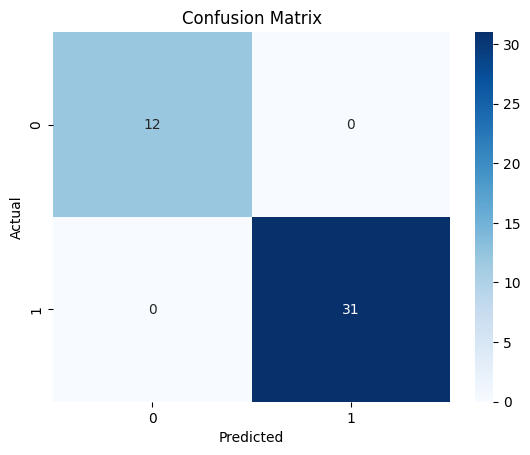

In [8]:
y_pred = rf_model.predict(X_test_scaled)

print("🔎 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 🔶 Step 8: Feature Importance (Explainability)


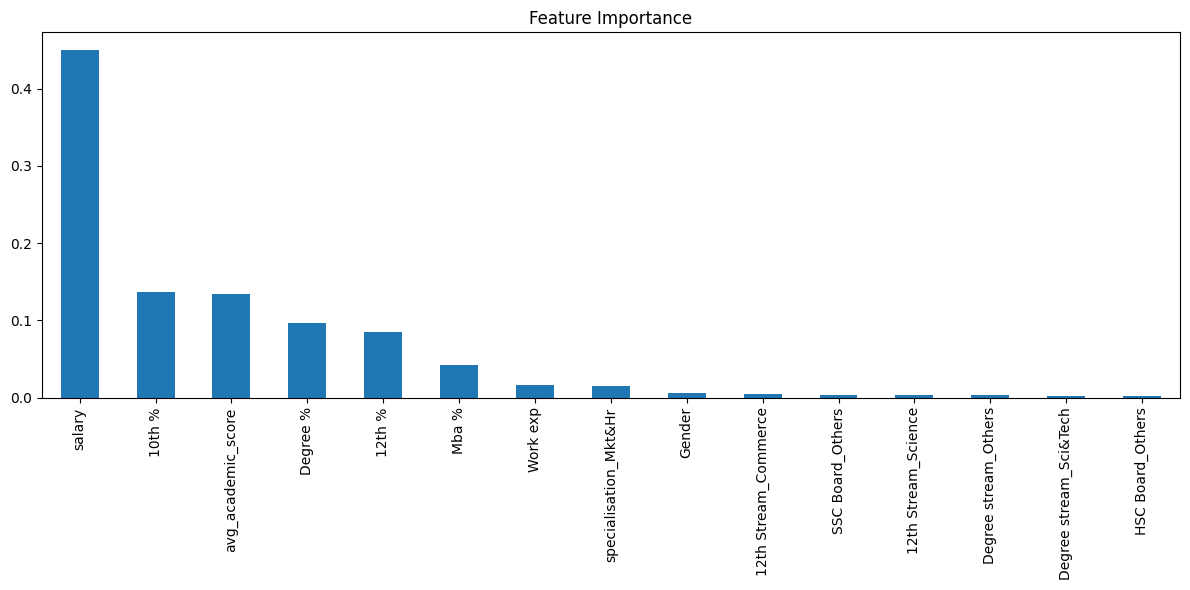

In [9]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importance")
plt.tight_layout()
plt.show()

1. Try other models (e.g., Logistic Regression, XGBoost)?
2. Perform hyperparameter tuning?
3. Export the model for deployment?